**Implement Neural Network (or Logistic Regression) From Scratch**

Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


Splitting the dataset into training and testing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [5]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

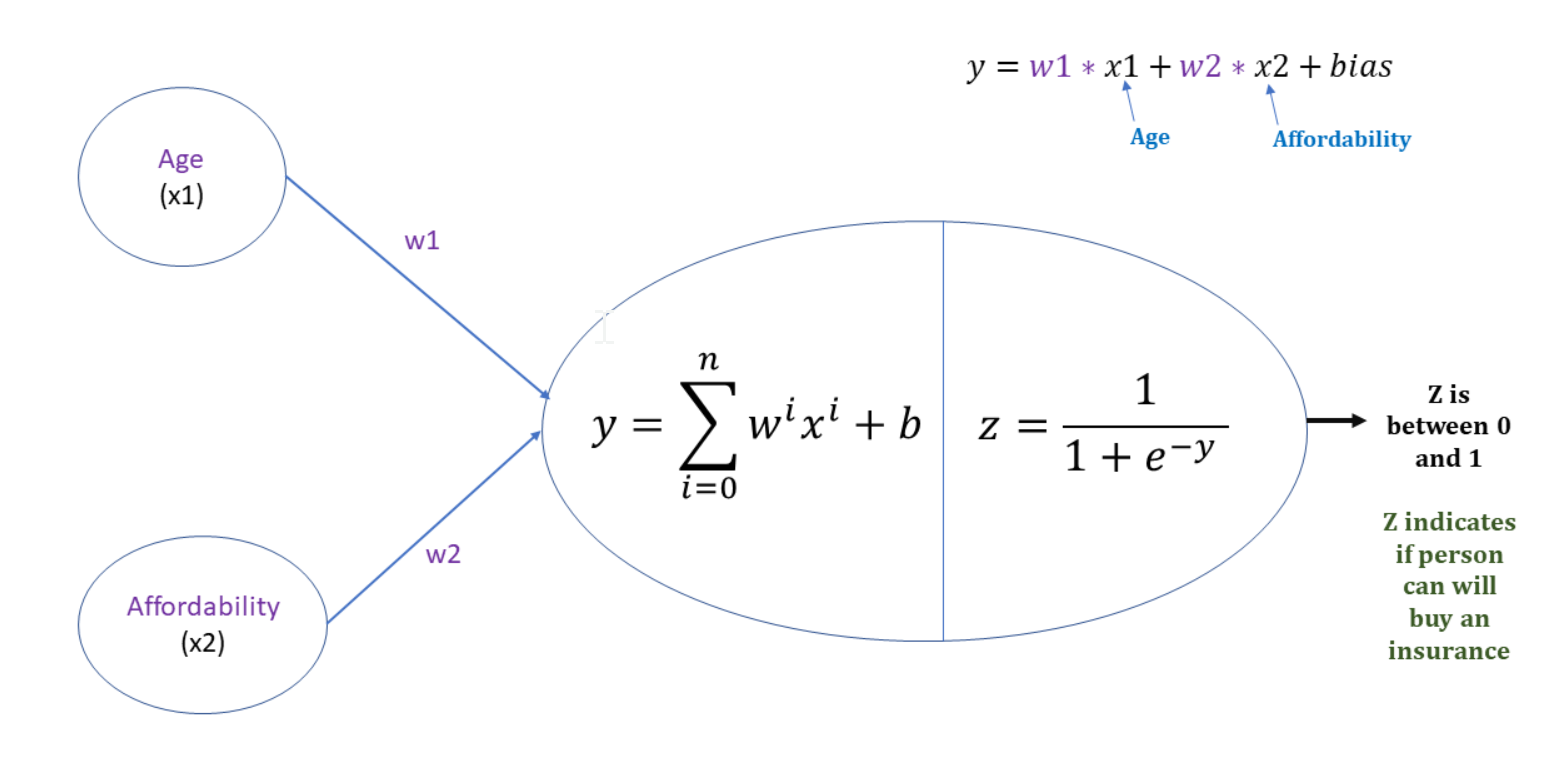

In [6]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, Y_train, epochs=5000)

Epoch 1/5000


C:\Users\ebrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - lo

Evaluate the model on test set

In [7]:
model.evaluate(X_test_scaled,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [8]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.70548487],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.72606957],
       [0.8294983 ]], dtype=float32)

In [9]:
Y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

Now get the value of weights and bias from the model

In [10]:
coef, intercept = model.get_weights()

In [11]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

This means w1=5.060867, w2=1.4086502, bias =-2.9137027

In [12]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [13]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [14]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

C:\Users\ebrah\AppData\Local\Temp\ipykernel_4008\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.705484819775958

In [15]:
prediction_function(.18, 1)

C:\Users\ebrah\AppData\Local\Temp\ipykernel_4008\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.35569571637887243

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [16]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [17]:
def log_loss(y_true, Y_predicted):
    epsilon = 1e-15
    Y_predicted_new = [max(i,epsilon) for i in Y_predicted]
    Y_predicted_new = [min(i,1-epsilon) for i in Y_predicted_new]
    Y_predicted_new = np.array(Y_predicted_new)
    return -np.mean(y_true*np.log(Y_predicted_new)+(1-y_true)*np.log(1-Y_predicted_new))

time to implement our own custom neural network class

In [18]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, Y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],Y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, Y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(Y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-Y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-Y_true)) 

            bias_d = np.mean(y_predicted-Y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [19]:
customModel = myNN()
customModel.fit(X_train_scaled, Y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917
Final weights and bias: w1: 5.051047623653049, w2: 

In [20]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function

In [22]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


(1) Predict using custom model

In [23]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

(2) Predict using tensorflow model

In [25]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.70548487],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.72606957],
       [0.8294983 ]], dtype=float32)

Above you can compare predictions from our own custom model and tensoflow model. You will notice that predictions are almost same